# Data Description

File descriptions
{train|test}.csv - the training set

This is the main table, broken into two files for Train (with a Target column) and Test (without the Target column).
One row represents one person in our data sample.
Multiple people can be part of a single household. Only predictions for heads of household are scored.
sample_submission.csv - a sample submission file in the correct format

This file contains all test IDs and a default value.
Note that ONLY the heads of household are used in scoring. All household members are included in test + the sample submission, but only heads of households are scored.
Core Data fields
Id - a unique identifier for each row.
Target - the target is an ordinal variable indicating groups of income levels. 
1 = extreme poverty 
2 = moderate poverty 
3 = vulnerable households 
4 = non vulnerable households
idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.
parentesco1 - indicates if this person is the head of the household.
This data contains 142 total columns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.max_columns = 150

In [5]:
unc_data = pd.read_csv('train.csv',index_col='Id')
unc_data_test = pd.read_csv('test.csv',index_col='Id')
unc_data.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
#shape of data
print('training_data:',unc_data.shape)
print('test_data:',unc_data_test.shape)

training_data: (9557, 142)
test_data: (23856, 141)


In [7]:
unc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9557 entries, ID_279628684 to ID_a38c64491
Columns: 142 entries, v2a1 to Target
dtypes: float64(8), int64(130), object(4)
memory usage: 10.4+ MB


In [8]:
unc_data.describe().round(2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2697.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,2215.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,1629.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.0,9557.00,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9552.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9552.00,9557.00,9557.00
mean,165231.61,0.04,4.96,0.02,0.99,0.96,0.23,1.40,0.39,1.56,1.95,0.40,1.66,2.06,0.79,3.22,4.01,4.00,4.09,7.20,0.46,4.00,0.59,0.08,0.19,0.01,0.12,0.01,0.00,0.00,0.69,0.22,0.00,0.00,0.02,0.07,0.97,0.02,0.00,0.00,0.68,0.96,0.03,0.00,0.89,0.00,0.00,0.11,0.00,0.21,0.76,0.02,0.00,0.00,0.49,0.46,0.05,0.88,0.03,0.08,0.00,0.0,0.00,0.1,0.33,0.57,0.13,0.29,0.58,0.1,0.25,0.65,0.06,0.48,0.52,0.14,0.12,0.27,0.03,0.06,0.03,0.34,0.31,0.18,0.38,0.01,0.01,0.05,0.01,0.00,0.01,0.00,0.01,0.01,1.41,2.59,0.28,4.00,9.23,0.13,0.17,0.21,0.19,0.11,0.02,0.02,0.14,0.02,2.74,1.61,0.62,0.1,0.18,0.02,0.08,0.1,0.28,0.98,2.82,0.59,0.09,0.06,0.08,0.09,0.08,0.71,0.29,34.30,74.22,1643.77,19.13,53.50,3.84,3.25,3.90,102.59,1643.77,3.30
std,150457.13,0.19,1.47,0.15,0.07,0.20,0.42,0.76,0.68,1.04,1.19,0.69,0.93,1.21,1.05,1.44,1.77,1.77,1.88,4.73,0.95,1.77,0.49,0.27,0.39,0.09,0.32,0.11,0.04,0.04,0.46,0.42,0.03,0.03,0.13,0.25,0.17,0.13,0.06,0.05,0.47,0.18,0.18,0.06,0.32,0.02,0.05,0.31,0.06,0.41,0.42,0.12,0.05,0.04,0.50,0.50,0.22,0.32,0.17,0.28,0.04,0.0,0.04,0.3,0.47,0.50,0.33,0.45,0.49,0.3,0.43,0.48,0.23,0.50,0.50,0.34,0.33,0.44,0.18,0.24,0.18,0.47,0.46,0.39,0.49,0.11,0.10,0.22,0.10,0.05,0.11,0.06,0.11,0.09,1.37,1.17,0.60,1.77,4.17,0.34,0.38,0.41,0.39,0.32,0.13,0.12,0.35,0.12,0.94,0.82,0.49,0.3,0.39,0.13,0.27,0.3,0.45,0.16,1.48,0.49,0.29,0.24,0.28,0.29,0.27,0.45,0.45,21.61,76.78,1741.20,18.75,78.45,6.95,4.13,12.51,93.52,1741.20,1.01
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0

In [83]:
#for checking null values
def check_null(data):
    for col in data.columns:
        na_values = data[col].isnull().sum()
        rows = data.shape[0]
        print(col,na_values,(na_values/rows)*100)
#for recalculating the dependency column
def calc_dependency(data):
    #dropping the old dependency column
    data = data.drop('dependency',axis=1)
    #recalculating the dependency
    data['dependency'] = (data.hogar_nin + data.hogar_mayor) / (data.hogar_adul - data.hogar_mayor)
    #new dependeny column calculated as per the formula with consistent entries
    data['dependency'] = data['dependency'].replace([np.inf,-np.inf],np.nan).fillna(0).round(2)
    return data
#for performing sanity checks on the categorical columns to check if they have consistent values
def sanity_check(data,full_col_list):
    for col_name,col_list in full_col_list.items():
        if data[col_list].apply(lambda x:x.sum(),axis=1).sum() == data.shape[0]:
            print('the {} columns look fine,no cleaning necessary'.format(col_name))
        else:
            print('there is a discrepancy in {} columns,requires investigation'.format(col_name))

In [15]:
#checking for null values--training data
print('training_data')
check_null(unc_data)
#checking for null values--test data
print('test_data')
check_null(unc_data_test)

training_data
v2a1 6860 71.7798472323951
v18q1 7342 76.82327090091033
rez_esc 7928 82.95490216595167
test_data
v2a1 17403 72.95020120724345
v18q1 18126 75.98088531187123
rez_esc 19653 82.3817907444668


In [17]:
#rez_esc column has 9139 rows where the value is either null or zero
print(unc_data[['escolari','rez_esc']][(unc_data['rez_esc'].isna()) | (unc_data['rez_esc'] == 0)])
#rez_esc column has 22916 rows where the value is either null or zero
print('test_data',unc_data_test[['escolari','rez_esc']][(unc_data_test['rez_esc'].isna()) | (unc_data_test['rez_esc'] == 0)])

              escolari  rez_esc
Id                             
ID_279628684        10      NaN
ID_f29eb3ddd        12      NaN
ID_68de51c94        11      NaN
ID_d56d6f5f5        11      NaN
ID_ec05b1a7b        11      NaN
ID_e9e0c1100         2      0.0
ID_3e04e571e         0      0.0
ID_1284f8aad         9      NaN
ID_51f52fdd2        11      NaN
ID_de822510c        12      NaN
ID_d94071d7c        11      NaN
ID_064b57869         4      NaN
ID_5c837d8a4        15      NaN
ID_0a39e419e        11      NaN
ID_4ff51f90c         2      NaN
ID_336c51386        11      NaN
ID_c51938edf        10      NaN
ID_35b66f7c6        12      NaN
ID_74a2bc523        15      NaN
ID_15d393ce7         4      NaN
ID_a0bff0ba7        16      NaN
ID_848b0fdf1         6      NaN
ID_298d857e5        13      NaN
ID_1d5bf8ddf        12      NaN
ID_e5cdba865        15      NaN
ID_e18530139         6      NaN
ID_cba035c44         6      NaN
ID_b6c1c7e65         8      NaN
ID_96b1fbc81         8      NaN
ID_42222

In [18]:
#dropping the rez_esc column in training and test set
unc_data = unc_data.drop('rez_esc',axis=1)
unc_data_test = unc_data_test.drop('rez_esc',axis=1)

In [19]:
#dependency column needs to be cleaned as it has inconsistent entries as per the formula
unc_data['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [20]:
unc_data_test['dependency'].unique()

array(['.5', 'no', '8', 'yes', '.25', '2', '.33333334', '.375',
       '.60000002', '1.5', '.2', '.75', '.66666669', '3', '.14285715',
       '.40000001', '.80000001', '1.6666666', '.2857143', '1.25', '2.5',
       '5', '.85714287', '1.3333334', '.16666667', '4', '.125',
       '.83333331', '2.3333333', '7', '1.2', '3.5', '2.25', '3.3333333',
       '6'], dtype=object)

In [21]:
#having a quick check on the columns
unc_data[['hogar_nin','hogar_adul','hogar_mayor','hogar_total','dependency']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency
Id,,,,,
ID_279628684,0,1,0,1,no
ID_f29eb3ddd,0,1,1,1,8
ID_68de51c94,0,1,1,1,8
ID_d671db89c,2,2,0,4,yes
ID_d56d6f5f5,2,2,0,4,yes
ID_ec05b1a7b,2,2,0,4,yes
ID_e9e0c1100,2,2,0,4,yes
ID_3e04e571e,2,2,0,4,yes
ID_1284f8aad,2,2,0,4,yes


In [22]:
unc_data_test[['hogar_nin','hogar_adul','hogar_mayor','hogar_total','dependency']]

,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency
Id,,,,,
ID_2f6873615,1,2,0,3,.5
ID_1c78846d2,1,2,0,3,.5
ID_e5442cf6a,1,2,0,3,.5
ID_a8db26a79,0,1,0,1,no
ID_a62966799,1,0,0,1,8
ID_e77d38d45,0,2,0,2,no
ID_3c5f4bd51,0,2,0,2,no
ID_a849c29bd,0,2,0,2,no
ID_472fa82da,0,2,0,2,no


In [24]:
#dependency column needs to be recalculated as per the given formula in the description.
#have checked the required columns consistency by adding up hogar_nin and hogar_adul and comparing with hogar_total
print((unc_data.hogar_nin + unc_data.hogar_adul == unc_data.hogar_total).sum())
#the three columns are consistent in test set as well,hence recalculating the dependency column
print((unc_data_test.hogar_nin + unc_data_test.hogar_adul == unc_data_test.hogar_total).sum())

9557
23856


In [25]:
#recalculating the dependency column in training set
unc_data = calc_dependency(unc_data)
#recalculating the dependency column in test set
unc_data_test = calc_dependency(unc_data_test)

In [26]:
#v18q1-no. of tablets owned has nan values for rows where the house does not own a tablet
#replacing the nan values with 0
unc_data['v18q1'] = unc_data['v18q1'].fillna(0)
unc_data_test['v18q1'] = unc_data_test['v18q1'].fillna(0)

In [27]:
#investigating the edjefe and edjefa columns which have numerical and categorical entries.
#need to reconcile these columns into one entry type,either numerical or continuous
unc_data[['edjefe','edjefa','parentesco1','male','female','escolari']]

,edjefe,edjefa,parentesco1,male,female,escolari
Id,,,,,,
ID_279628684,10,no,1,1,0,10
ID_f29eb3ddd,12,no,1,1,0,12
ID_68de51c94,no,11,1,0,1,11
ID_d671db89c,11,no,0,1,0,9
ID_d56d6f5f5,11,no,0,0,1,11
ID_ec05b1a7b,11,no,1,1,0,11
ID_e9e0c1100,11,no,0,0,1,2
ID_3e04e571e,9,no,0,0,1,0
ID_1284f8aad,9,no,1,1,0,9


In [28]:
unc_data['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [29]:
#As per the observation of these entries,the calculation of edjefe and edjefa are inconsistent
#they need to be recalculated correctly or dropped altogether to avoid inducing false/incorrect information in the dataset
unc_data[['edjefe','edjefa','parentesco1','male','female','escolari']][unc_data['edjefa']=='yes']

,edjefe,edjefa,parentesco1,male,female,escolari
Id,,,,,,
ID_1b32caf34,no,yes,1,0,1,1
ID_33f8f9cfb,no,yes,0,0,1,0
ID_f2f0e758f,no,yes,0,1,0,6
ID_f23811c6b,no,yes,1,0,1,1
ID_ed2a651c5,no,yes,0,0,1,7
ID_fcd3fddcb,no,yes,0,1,0,1
ID_68ec000c5,no,yes,1,0,1,1
ID_b6ace75f7,no,yes,0,1,0,10
ID_5bf66e991,no,yes,0,1,0,9


In [30]:
#dropping edjefe and edjefa columns
unc_data = unc_data.drop(['edjefe','edjefa'],axis=1)
unc_data_test = unc_data_test.drop(['edjefe','edjefa'],axis=1)

In [31]:
#tamhog and hhsize have the same values accross the dataset,hence can drop one of the two
print((unc_data['tamhog'] == unc_data['hhsize']).sum())
print((unc_data_test['tamhog'] == unc_data_test['hhsize']).sum())

9557
23856


In [32]:
#dropping tamhog column
unc_data = unc_data.drop('tamhog',axis=1)
unc_data_test = unc_data_test.drop('tamhog',axis=1)

In [33]:
#investigating the mobilephone columns to check if they are consistent with each other
print('training_data',unc_data[['mobilephone','qmobilephone']].query('mobilephone == 0 & qmobilephone != 0').sum())
print('test_data',unc_data_test[['mobilephone','qmobilephone']].query('mobilephone == 0 & qmobilephone != 0').sum())

training_data mobilephone     0
qmobilephone    0
dtype: int64
test_data mobilephone     0
qmobilephone    0
dtype: int64


In [39]:
#grouping all the columns according to the attributes they represent about the household/individual
categorical_columns = {'wall_attrib' :['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother'],
                       'floor_attrib':['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera'],
                       'roof_attrib' :['techozinc','techoentrepiso','techocane','techootro'],
                       'water_attrib':['abastaguadentro','abastaguafuera','abastaguano'],
                       'electric_attrib' : ['public','planpri','noelec','coopele'],
                       'sanitary_attrib' : ['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6'],
                       'energy_attrib' : ['energcocinar1','energcocinar2','energcocinar3','energcocinar4'],
                       'disposal_attrib' : ['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6'],
                       'wall_qual' : ['epared1','epared2','epared3'],
                       'roof_qual' : ['etecho1','etecho2','etecho3'],
                       'floor_qual' : ['eviv1','eviv2','eviv3'],
                       'status' : ['estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7'],
                       'edu_level' : ['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9'],
                       'ownership_status' : ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5'],
                       'region' : ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']
                      }

In [40]:
#performing sanity checks on the columns to check if they have consistent entries
sanity_check(unc_data,categorical_columns)
#we need to investigate the roof,electric and education level columns

the wall_attrib columns look fine,no cleaning necessary
the floor_attrib columns look fine,no cleaning necessary
there is a discrepancy in roof_attrib columns,requires investigation
the water_attrib columns look fine,no cleaning necessary
there is a discrepancy in electric_attrib columns,requires investigation
the sanitary_attrib columns look fine,no cleaning necessary
the energy_attrib columns look fine,no cleaning necessary
the disposal_attrib columns look fine,no cleaning necessary
the wall_qual columns look fine,no cleaning necessary
the roof_qual columns look fine,no cleaning necessary
the floor_qual columns look fine,no cleaning necessary
the status columns look fine,no cleaning necessary
there is a discrepancy in edu_level columns,requires investigation
the ownership_status columns look fine,no cleaning necessary
the region columns look fine,no cleaning necessary


In [42]:
#the same columns need to be investigated in test set as well
sanity_check(unc_data_test,categorical_columns)

the wall_attrib columns look fine,no cleaning necessary
the floor_attrib columns look fine,no cleaning necessary
there is a discrepancy in roof_attrib columns,requires investigation
the water_attrib columns look fine,no cleaning necessary
there is a discrepancy in electric_attrib columns,requires investigation
the sanitary_attrib columns look fine,no cleaning necessary
the energy_attrib columns look fine,no cleaning necessary
the disposal_attrib columns look fine,no cleaning necessary
the wall_qual columns look fine,no cleaning necessary
the roof_qual columns look fine,no cleaning necessary
the floor_qual columns look fine,no cleaning necessary
the status columns look fine,no cleaning necessary
there is a discrepancy in edu_level columns,requires investigation
the ownership_status columns look fine,no cleaning necessary
the region columns look fine,no cleaning necessary


In [43]:
#there are certain rows where all the roof columns have 0
#as per the competition host it is a small glitch which implies the roof is made out of waste material
#we need to introduce a new column which captures this information
roof_attrib = categorical_columns['roof_attrib']
unc_data[roof_attrib][unc_data.techozinc+unc_data.techoentrepiso+unc_data.techocane+unc_data.techootro != 1]

,techozinc,techoentrepiso,techocane,techootro
Id,,,,
ID_f435c5e46,0,0,0,0
ID_a51262dae,0,0,0,0
ID_7e6d23b28,0,0,0,0
ID_4c409e16e,0,0,0,0
ID_0704f4d9f,0,0,0,0
ID_b0adca84e,0,0,0,0
ID_0e4c312aa,0,0,0,0
ID_6274a9721,0,0,0,0
ID_fb96aba6c,0,0,0,0


In [44]:
unc_data_test[roof_attrib][unc_data_test.techozinc+unc_data_test.techoentrepiso+unc_data_test.techocane+unc_data_test.techootro != 1]

,techozinc,techoentrepiso,techocane,techootro
Id,,,,
ID_052f34b82,0,0,0,0
ID_ea06fb805,0,0,0,0
ID_da22d519b,0,0,0,0
ID_5af92695a,0,0,0,0
ID_2c16ea329,0,0,0,0
ID_c0e28c32b,0,0,0,0
ID_7814ca663,0,0,0,0
ID_2dc5ff9f3,0,0,0,0
ID_216dcb033,0,0,0,0


In [46]:
#techowaste would be the new column that would be 1 for roof made out of waste material
unc_data['techowaste'] = 0
unc_data['techowaste'][unc_data.techozinc+unc_data.techoentrepiso+unc_data.techocane+unc_data.techootro == 0] = 1

C:\Users\farazz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
unc_data_test['techowaste'] = 0
unc_data_test['techowaste'][unc_data_test.techozinc+unc_data_test.techoentrepiso+unc_data_test.techocane+unc_data_test.techootro == 0] = 1

C:\Users\farazz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
#as per the competition host,when all the columns have zeroes,then the value should be other
#need to create a new column that would capture this information
electric_attrib = categorical_columns['electric_attrib']
unc_data[electric_attrib][unc_data.public+unc_data.planpri+unc_data.noelec+unc_data.coopele != 1]

,public,planpri,noelec,coopele
Id,,,,
ID_5152dd62c,0,0,0,0
ID_0a204866b,0,0,0,0
ID_0b4c30044,0,0,0,0
ID_422a11594,0,0,0,0
ID_7c276c125,0,0,0,0
ID_5b72c128a,0,0,0,0
ID_f63f8d490,0,0,0,0
ID_fade08814,0,0,0,0
ID_48466b51d,0,0,0,0


In [49]:
unc_data_test[electric_attrib][unc_data_test.public+unc_data_test.planpri+unc_data_test.noelec+unc_data_test.coopele != 1]

,public,planpri,noelec,coopele
Id,,,,
ID_2c16ea329,0,0,0,0
ID_c0e28c32b,0,0,0,0
ID_7814ca663,0,0,0,0
ID_2dc5ff9f3,0,0,0,0
ID_216dcb033,0,0,0,0
ID_df5b6d0cc,0,0,0,0
ID_5ae314ab1,0,0,0,0
ID_e1946e232,0,0,0,0
ID_e5744b727,0,0,0,0


In [76]:
#creating a new column elecother
unc_data['elecother'] = 0
unc_data['elecother'][unc_data.public+unc_data.planpri+unc_data.noelec+unc_data.coopele == 0] = 1

C:\Users\farazz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
unc_data_test['elecother'] = 0
unc_data_test['elecother'][unc_data_test.public+unc_data_test.planpri+unc_data_test.noelec+unc_data_test.coopele == 0] = 1

C:\Users\farazz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
#these are the three ids where the education level is unknown
#we do not know if they never had an education,so we cannot substitute 0
#we can introduce another level to capture this information or assume they did not have an education
edu_level = categorical_columns['edu_level']
unc_data[edu_level][unc_data[edu_level].apply(lambda x:x.sum() != 1,axis=1)]

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
Id,,,,,,,,,
ID_8bf12f7d5,0,0,0,0,0,0,0,0,0
ID_b9e6855a3,0,0,0,0,0,0,0,0,0
ID_5994b8a31,0,0,0,0,0,0,0,0,0


In [53]:
#these are the ids where the education level is unknownin the test set
unc_data_test[edu_level][unc_data_test[edu_level].apply(lambda x:x.sum() != 1,axis=1)]

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
Id,,,,,,,,,
ID_a7b802404,0,0,0,0,0,0,0,0,0
ID_6bec97002,0,0,0,0,0,0,0,0,0
ID_322dbdef3,0,0,0,0,0,0,0,0,0
ID_a77a1676c,0,0,0,0,0,0,0,0,0
ID_01d4b05cc,0,0,0,0,0,0,0,0,0


In [54]:
indx_train = unc_data[edu_level][unc_data[edu_level].apply(lambda x:x.sum() != 1,axis=1)].index
indx_test = unc_data_test[edu_level][unc_data_test[edu_level].apply(lambda x:x.sum() != 1,axis=1)].index

In [55]:
#dropping rows where education level is unknown
unc_data = unc_data.drop(indx_train)
#unc_data_test = unc_data_test.drop(indx_test)

In [56]:
#dropping the squared_attributes.would be constructing features later during feature engineering
squared_attrib = ['SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq']
unc_data = unc_data.drop(squared_attrib,axis=1)
unc_data_test = unc_data_test.drop(squared_attrib,axis=1)

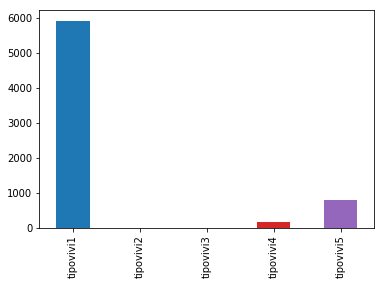

In [57]:
#cleaning the v2a1 column which contains null values
#monthly rent payment would only be applicable to households which pay rent
#we need to check the ownership status and decide what values to substitute in this column
ownership_status = categorical_columns['ownership_status']
unc_data[ownership_status][(unc_data.v2a1.isnull()) & (unc_data.tipovivi3 != 1)].sum().plot(kind='bar')
plt.show()

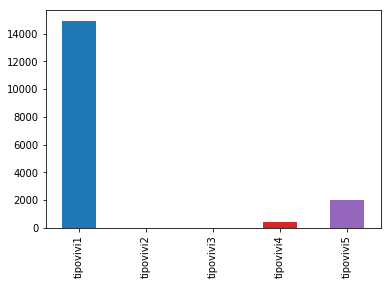

In [58]:
unc_data_test[ownership_status][(unc_data_test.v2a1.isnull()) & (unc_data_test.tipovivi3 != 1)].sum().plot(kind='bar')
plt.show()

In [59]:
#substituting 0 for rows where the ownership status is 1,i.e the house is owned
unc_data.loc[(unc_data.tipovivi1 == 1),'v2a1'] = 0
unc_data_test.loc[(unc_data_test.tipovivi1 == 1),'v2a1'] = 0

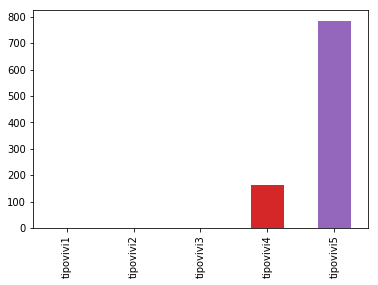

In [176]:
unc_data[ownership_status][(unc_data.v2a1.isnull()) & (unc_data.tipovivi3 != 1)].sum().plot(kind='bar')
plt.show()

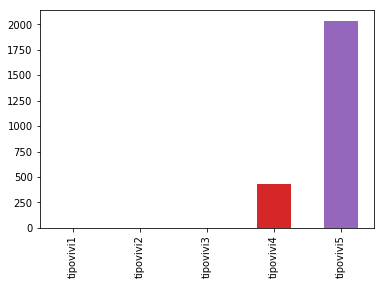

In [60]:
unc_data_test[ownership_status][(unc_data_test.v2a1.isnull()) & (unc_data_test.tipovivi3 != 1)].sum().plot(kind='bar')
plt.show()

In [62]:
#for the rest of the rows,where the rent is null,we would be imputing the values 
#and also adding a column indicating the same.
mean_rent_train = unc_data['v2a1'].mean()

unc_data['rent-missing'] = 0

unc_data['rent-missing'][unc_data.v2a1.isnull()] = 1

unc_data['v2a1']=unc_data['v2a1'].fillna(mean_rent_train)


C:\Users\farazz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [63]:
mean_rent_test = unc_data_test['v2a1'].mean()
unc_data_test['rent-missing'] = 0
unc_data_test['rent-missing'][unc_data_test.v2a1.isnull()] = 1
unc_data_test['v2a1']=unc_data_test['v2a1'].fillna(mean_rent_test)

C:\Users\farazz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
#the next step is to correct the labels where the members of the household,
#have a different poverty label to the head of the household
same_labels = unc_data.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
diff_labels = same_labels[same_labels != True]

In [66]:
#correcting the target labels
for idx in diff_labels.index:
    correct_label = unc_data['Target'][(unc_data.idhogar == idx) & (unc_data.parentesco1 == 1)].values[0]
    unc_data['Target'][(unc_data.idhogar == idx) & (unc_data.parentesco1 != 1)] = correct_label

C:\Users\farazz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [70]:
unc_data[unc_data['meaneduc'].isnull()]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target,dependency,techowaste,rent-missing
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [67]:
unc_data_test[unc_data_test['meaneduc'].isnull()]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,dependency,techowaste,elecother,rent-missing
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ID_a62966799,175000.000000,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,11,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,NaN,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,0.0,0,0,0
ID_ab0fe3b38,399378.000000,0,6,0,1,0,1,3.0,0,0,0,0,1,1,0,1,1,4,11,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,bb7038e41,1,0,0,1,NaN,0,0,0,0,1,0,0,0,0,4,1.000000,0,0,1,0,0,0,1,1,4,1,0,0,0,0,0,1,0,18,0.0,0,0,0
ID_4f297efe7,180000.000000,0,4,0,1,1,0,0.0,0,0,0,0,2,2,0,2,2,2,12,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4937daf94,2,0,0,2,NaN,0,0,0,0,0,0,0,1,0,2,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,0.0,0,0,0
ID_b41dee3bb,180000.000000,0,4,0,1,1,0,0.0,0,0,0,0,2,2,0,2,2,2,12,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4937daf94,2,0,0,2,NaN,0,0,0,0,0,0,0,1,0,2,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,0.0,0,0,0
ID_ad3389376,100000.000000,0,2,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,8,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4deb0c65e,2,0,0,2,NaN,0,0,0,1,0,0,0,0,0,1,2.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,0.0,0,0,0
ID_2586969c3,100000.000000,0,2,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,6,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4deb0c65e,2,0,0,2,NaN,0,0,1,0,0,0,0,0,0,1,2.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,17,0.0,0,0,0
ID_fd724fb68,135000.000000,0,3,0,1,1,0,0.0,0,0,0,0,2,2,0,2,2,2,12,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,74718009d,2,0,0,2,NaN,0,0,0,0,0,0,0,1,0,2,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,0.0,0,0,0
ID_7f6900abb,135000.000000,0,3,0,1,1,0,0.0,0,0,0,0,2,2,0,2,2,2,12,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,74718009d,2,0,0,2,NaN,0,0,0,0,0,0,0,1,0,2,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,0.0,0,0,0
ID_84ddecd60,90000.000000,0,3,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,12,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0

In [69]:
#imputing the mean_educ column
edu_mean = unc_data['meaneduc'].mean()
unc_data['meaneduc'] = unc_data['meaneduc'].fillna(edu_mean)

In [68]:
edu_mean = unc_data_test['meaneduc'].mean()
unc_data_test['meaneduc'] = unc_data_test['meaneduc'].fillna(edu_mean)

In [94]:
unc_data.to_csv('training_set.csv')

In [95]:
unc_data_test.to_csv('test_set.csv')